In [47]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
from newsapi import NewsApiClient
import traceback
import numpy as np

nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/apm_daemon/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [48]:
# Read in newsapi key from config.xml
import xml.etree.ElementTree as ET

conf={}
parse=ET.parse('nlp_exercise.xml')
root=parse.getroot()

for prop in root.findall('property'):
    key=prop.find('name').text
    val=prop.find('value').text
    conf[key]=val
    
#print(conf.get('newsapi.key'))

In [49]:
newsapi=NewsApiClient(api_key=conf.get('newsapi.key'))

In [50]:
btc_news=newsapi.get_everything(q='(bitcoin OR btc) AND 2020',language='en')

In [51]:
eth_news=newsapi.get_everything(q='(ethereum OR eth) AND 2020',language='en')

In [52]:
def sentiment(score):
    result=0
    if score>=0.05:
        result=1
    elif score<=-0.05:
        result=-1
    return result

In [53]:
# Parse api return obj + store in dataframe
col_labels=['title','description','text','date','text_compound','text_pos','text_neu','text_neg','text_sent']

btc_df=pd.DataFrame(columns=col_labels)
for item in btc_news['articles']:
    try:
        text_sentiment=analyzer.polarity_scores(item['content'])
        
        print(item['content'])
        
        btc_df=btc_df.append({'title':item['title'],
                              'description':item['description'],
                              'text':item['content'],
                              'date':item['publishedAt'][:10],
                              'text_compound':text_sentiment['compound'],
                              'text_pos':text_sentiment['pos'],
                              'text_neu':text_sentiment['neu'],
                              'text_neg':text_sentiment['neg'],
                              'text_sent':sentiment(text_sentiment['compound'])},
                              ignore_index=True)
    except:
        traceback.print_exc()
        pass

#print(btc_df.head())

Illustration by Grayson Blackmon / The Verge

 

 One of the wildest stories of the year was the day some of the most-followed Twitter accounts on the planet posted cryptocurrency scams because of a… [+4340 chars]
New York (CNN Business)Bitcoin has been flirting with the $30,000 mark for weeks, and finally passed that record-setting level Saturday. The virtual currency is now valued at above $33,000, an all-ti… [+2108 chars]
After reaching a previous all-time high on November 30th, 2020 and December 1st, 2020, bitcoin is now trading well above $20,000 and has surpassed its previous peak price.
Bitcoins value has rapidly… [+1062 chars]
Keep an eye out today — we may see the first high-altitude test flight for SpaceX’s Starship. The vehicle Elon Musk sees as the key to fast travel around the Earth and multiplanetary living has only … [+3833 chars]
January
4, 2021
4 min read
This article was translated from our Spanish edition using AI technologies. Errors may exist due to this process.
O

In [54]:
eth_df=pd.DataFrame(columns=col_labels)
for item in eth_news['articles']:
    try:
        text_sentiment=analyzer.polarity_scores(item['content'])
        
        eth_df=eth_df.append({'title':item['title'],
                              'description':item['description'],
                              'text':item['content'],
                              'date':item['publishedAt'][:10],
                              'text_compound':text_sentiment['compound'],
                              'text_pos':text_sentiment['pos'],
                              'text_neu':text_sentiment['neu'],
                              'text_neg':text_sentiment['neg'],
                              'text_sent':sentiment(text_sentiment['compound'])},
                              ignore_index=True)
        print(item['content'])
    except:
        traceback.print_exc()
        pass
    
print(eth_df.head())

It seems only fitting to end 2020 on a depressing note, and to that end, a cryptocurrency miner living in Las Vegas has apparently managed to procure dozens of PNY brand GeForce RTX 3080 cards to min… [+3181 chars]
Ethereum is one of the leading crypto projects (second to bitcoin). In December 2020 Ethereum released the first stage of Ethereum 2.0. The biggest difference is that there is no need for an expensiv… [+12510 chars]
LONDON (Reuters) - Bitcoin on Wednesday jumped to a record $28,599.99, after the digital currency almost quadrupled in value this year amid heightened interest from bigger investors.
The worlds most… [+1092 chars]
NEW YORK (Reuters) - Outsized bets on large U.S. technology companies and emerging cryptocurrencies fueled the years top-performing U.S. mutual fund and exchange-traded funds as the coronavirus pande… [+3726 chars]
NEW YORK (Reuters) - Total investor inflows into cryptocurrency funds and products hit $5.6 billion so far this year, up more than 600% from

In [55]:
btc_df.describe()

,text_compound,text_pos,text_neu,text_neg
count,20.000000,20.000000,20.000000,20.000000
mean,0.105880,0.058950,0.913000,0.028050
std,0.409729,0.079138,0.081385,0.039791
min,-0.585900,0.000000,0.767000,0.000000
25%,-0.085000,0.000000,0.847500,0.000000
50%,0.000000,0.000000,0.928000,0.000000
75%,0.444400,0.133000,1.000000,0.070500
max,0.817300,0.233000,1.000000,0.103000


In [56]:
eth_df.describe()

,text_compound,text_pos,text_neu,text_neg
count,20.000000,20.000000,20.00000,20.000000
mean,0.093665,0.031800,0.95715,0.011100
std,0.262376,0.044973,0.04583,0.023398
min,-0.381800,0.000000,0.84500,0.000000
25%,0.000000,0.000000,0.93275,0.000000
50%,0.000000,0.000000,0.94800,0.000000
75%,0.272800,0.063500,1.00000,0.000000
max,0.629300,0.155000,1.00000,0.067000


In [11]:
# Which coin had the highest mean positive score?
# Which coin had the highest compound score?
# Which coin had the highest positive score?

In [12]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from string import punctuation
from wordcloud import WordCloud
import re

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/apm_daemon/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/apm_daemon/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/apm_daemon/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [13]:
lemmatizer=WordNetLemmatizer()
def process_text(article):
    sw=set(stopwords.words('english'))
    sw_append={'char','chars'}
    
    regex=re.compile("[^a-zA-Z ]")    
    re_clean=regex.sub(' ', article)
    words=word_tokenize(re_clean)
    words=[word for word in words if word.isalpha()]
    
    lem=[lemmatizer.lemmatize(word) for word in words]    
    output=[word.lower() for word in lem if word.lower() not in sw.union(sw_append)]
    return output

In [14]:
# Create tokens col - btc_df
btc_df['tokens']=np.nan
btc_df['tokens']=btc_df['tokens'].astype(object)
for i,row in btc_df.iterrows():
    btc_df.at[i,'tokens']=process_text(btc_df.iloc[i,btc_df.columns.get_loc('text')])

print(btc_df.head())

                                               title  \
0  Months later, the great Twitter hack still bog...   
1       Bitcoin soars past $33,000, its highest ever   
2      Bitcoin passes $20k and reaches all-time high   
3  The Morning After: SpaceX lines up a big test ...   
4  Bitcoin plummets after surpassing $ 34,000 per...   

                                         description  \
0  On July 15th, some of the most-followed Twitte...   
1  Bitcoin has been flirting with the $30,000 mar...   
2  After reaching a previous all-time high on Nov...   
3  Keep an eye out today — we may see the first h...   
4  After a long winning streak, this is the bigge...   

                                                text        date  \
0  Illustration by Grayson Blackmon / The Verge\r...  2020-12-15   
1  New York (CNN Business)Bitcoin has been flirti...  2021-01-02   
2  After reaching a previous all-time high on Nov...  2020-12-16   
3  Keep an eye out today — we may see the first h...  

In [15]:
# Create tokens col - eth_df
eth_df['tokens']=np.nan
eth_df['tokens']=eth_df['tokens'].astype(object)
for i,row in eth_df.iterrows():
    eth_df.at[i,'tokens']=process_text(eth_df.iloc[i,eth_df.columns.get_loc('text')])
print(eth_df.head())

                                               title  \
0  This crypto-mining farm with 78 GeForce RTX 30...   
1             Make passive income using Ethereum 2.0   
2  Bitcoin jumps to record $28,600 as 2020 rally ...   
3  Big tech bets and cryptocurrencies power 2020'...   
4  Total crypto fund inflows top $5 billion this ...   

                                         description  \
0  <ol><li>This crypto-mining farm with 78 GeForc...   
1  Learn how to become eth2 validator and earn st...   
2  Bitcoin on Wednesday jumped to a record $28,59...   
3  Outsized bets on large U.S. technology compani...   
4  Total investor inflows into cryptocurrency fun...   

                                                text        date  \
0  It seems only fitting to end 2020 on a depress...  2020-12-31   
1  Ethereum is one of the leading crypto projects...  2020-12-26   
2  LONDON (Reuters) - Bitcoin on Wednesday jumped...  2020-12-30   
3  NEW YORK (Reuters) - Outsized bets on large U....  

In [16]:
from collections import Counter
from nltk import ngrams

In [17]:
# Generate the Bitcoin N-grams where N=2
btc_df['word_count']=np.nan
btc_df['word_count']=btc_df['word_count'].astype(object)

btc_df['ngram_count']=np.nan
btc_df['ngram_count']=btc_df['ngram_count'].astype(object)
for i,row in btc_df.iterrows():
    btc_df.at[i,'word_count']=Counter(row.tokens)
    btc_df.at[i,'ngram_count']=Counter(ngrams(row.tokens,n=2))
print(btc_df)

                                                title  \
0   Months later, the great Twitter hack still bog...   
1        Bitcoin soars past $33,000, its highest ever   
2       Bitcoin passes $20k and reaches all-time high   
3   The Morning After: SpaceX lines up a big test ...   
4   Bitcoin plummets after surpassing $ 34,000 per...   
5   Winklevoss comes out of meditation to witness ...   
6   Tesla's Elon Musk asks about converting 'large...   
7   Bitcoin is unstoppable! It reached $ 28,900 pe...   
8   Is rising usage driving crypto’s recent price ...   
9                Bitcoin Blows Past $20,000 Milestone   
10  Mark Cuban, the American millionaire, reveals ...   
11  With investors expecting a Latin American cryp...   
12  Bitcoin hits record $28,599.99 as 2020 rally p...   
13  Bitcoin hits record $28,600 as 2020 rally powe...   
14  UPDATE 1-Bitcoin hits record $28,600 as 2020 r...   
15  Bitcoin hits record $28,600 as 2020 rally powe...   
16  Bitcoin touches record abov

In [18]:
# Generate the Ethereum N-grams where N=2
eth_df['word_count']=np.nan
eth_df['word_count']=eth_df['word_count'].astype(object)

eth_df['ngram_count']=np.nan
eth_df['ngram_count']=eth_df['ngram_count'].astype(object)
for i,row in eth_df.iterrows():
    eth_df.at[i,'word_count']=Counter(row.tokens)
    eth_df.at[i,'ngram_count']=Counter(ngrams(row.tokens,n=2))
print(eth_df)

                                                title  \
0   This crypto-mining farm with 78 GeForce RTX 30...   
1              Make passive income using Ethereum 2.0   
2   Bitcoin jumps to record $28,600 as 2020 rally ...   
3   Big tech bets and cryptocurrencies power 2020'...   
4   Total crypto fund inflows top $5 billion this ...   
5   Crypto exchange Coinbase hit by tech trouble a...   
6   Crypto exchange Coinbase hit by tech trouble a...   
7   Crypto exchange Coinbase hit by tech trouble a...   
8   You can now buy Bitcoin with Apple Pay, thru L...   
9   A crypto CEO breaks down why he would not be s...   
10  Crypto fund inflows hit second highest on reco...   
11  Crypto fund inflows hit second highest on reco...   
12  Ether soars above $1,000 in broad cryptocurren...   
13  Bitcoin rally comes to a halt as prices fall m...   
14  Big tech bets and cryptocurrencies power 2020'...   
15  Crypto trading volumes hit record $68.3 billio...   
16  Crypto trading volumes hit 

In [19]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens,N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [20]:
# Get the top 10 words for Bitcoin
top_words_btc=dict()
for i,row in btc_df.iterrows():
    tmp=row.word_count
    for word in tmp:
        if word not in top_words_btc:
            top_words_btc[word]=tmp[word]
        else:
            top_words_btc[word]=top_words_btc[word]+tmp[word]

print(token_count(top_words_btc))

[('bitcoin', 15), ('reuters', 13), ('illustration', 9), ('year', 8), ('wa', 8), ('ha', 6), ('price', 6), ('wednesday', 6), ('cryptocurrency', 5), ('new', 5)]


In [21]:
# Get the top 10 words for Ethereum
top_words_eth=dict()
for i,row in eth_df.iterrows():
    tmp=row.word_count
    for word in tmp:
        if word not in top_words_eth:
            top_words_eth[word]=tmp[word]
        else:
            top_words_eth[word]=top_words_eth[word]+tmp[word]
print(token_count(top_words_eth))

[('reuters', 22), ('bitcoin', 14), ('illustration', 12), ('taken', 11), ('currency', 10), ('cryptocurrency', 8), ('file', 8), ('photo', 8), ('london', 7), ('new', 7)]


In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize']=[20.0,10.0]

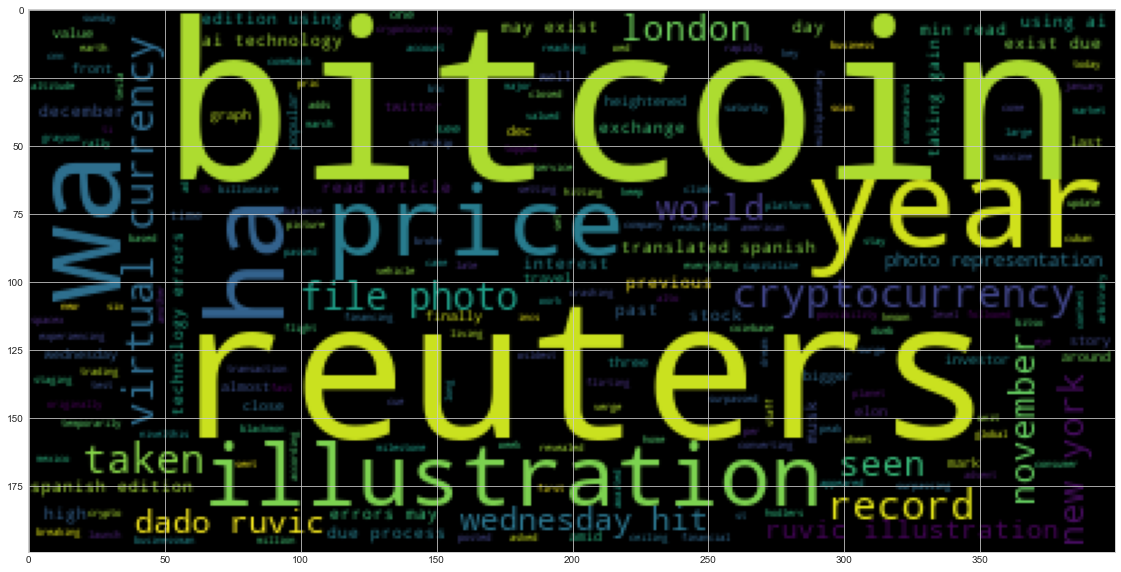

In [27]:
# Generate the Bitcoin word cloud
btc_list=list()
for i,row in btc_df.iterrows():
    btc_list=btc_list+row.tokens

btc_wc=WordCloud().generate(' '.join(btc_list))
plt.imshow(btc_wc)

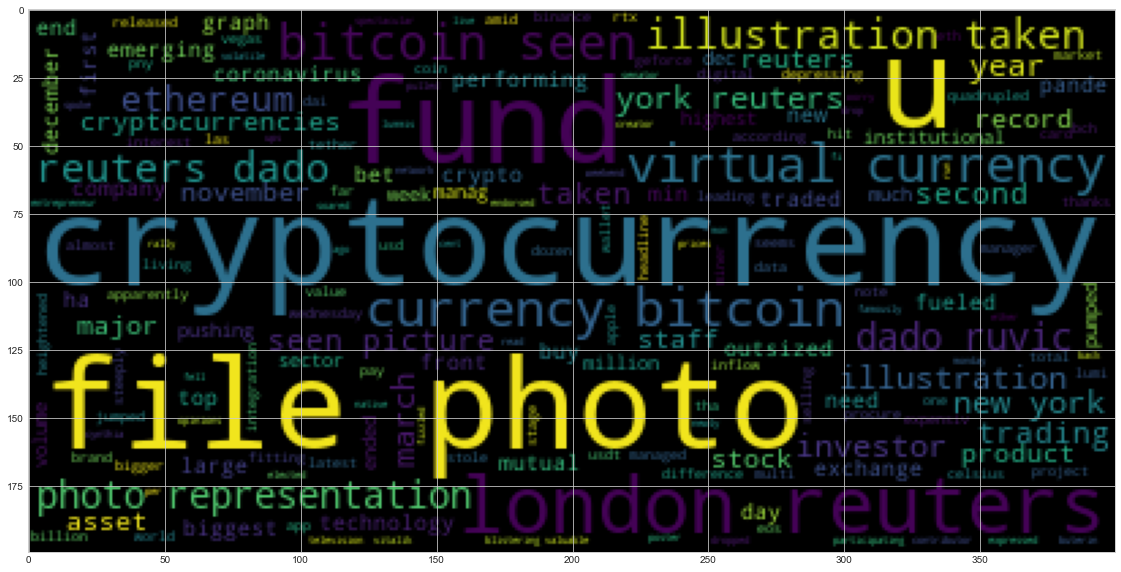

In [28]:
# Generate the Ethereum word cloud

eth_list=list()
for i,row in eth_df.iterrows():
    eth_list=eth_list+row.tokens

eth_wc=WordCloud().generate(' '.join(eth_list))
plt.imshow(eth_wc)

In [31]:
import spacy
from spacy import displacy

In [32]:
# Load the spaCy model
nlp=spacy.load('en_core_web_sm')

In [34]:
# Concatenate all of the bitcoin text together
btc_string=""
for i,row in btc_df.iterrows():
    btc_string=btc_string+str(row.text)

In [35]:
# Run the NER processor on all of the text
btc_doc=nlp(btc_string)

# Add a title to the document

In [13]:
# Render the visualization
displacy.render(btc_doc,style='ent')

In [43]:
# List all Entities
for e in btc_doc.ents:
    print(e.text+" / "+e.label_)

Grayson Blackmon / / PERSON
the year / DATE
the day / DATE
Twitter / ORG
CNN / ORG
$30,000 mark / MONEY
weeks / DATE
Saturday / DATE
above $33,000 / MONEY
November 30th, 2020 / DATE
December 1st / DATE
2020 / DATE
bitcoin / GPE
above $20,000 / MONEY
today / DATE
first / ORDINAL
Elon Musk / ORG
Earth / LOC
4, 2021 / DATE
4 min / QUANTITY
Spanish / NORP
AI / GPE
One day / DATE
34,000 / MONEY
BTC / ORG
20,000 / MONEY
Wednesday around three years / DATE
Sunday / DATE
Tesla Incs / EVENT
Twitter / ORG
Musk / ORG
30 / CARDINAL
2020 / DATE
3 / CARDINAL
Spanish / NORP
AI / GPE
Alto NivelThis / WORK_OF_ART
2020 / DATE
late-year / DATE
Bitcoin / GPE
over $23,000 / MONEY
almost three years / DATE
the day / DATE
Bitcoin / GPE
20,000 / MONEY
Wednesday / DATE
18, 2020 / DATE
3 min / QUANTITY
Spanish / NORP
AI / GPE
Mark Cuban / PERSON
American / NORP
chars]Six years / DATE
Mexico / GPE
$62 million / MONEY
Reuters / ORG
LONDON / GPE
Dec 30 / DATE
Reuters / ORG
Bitcoin / GPE
Wednesday / DATE
a record $

In [36]:
# Concatenate all of the ethereum text together
eth_string=""
for i,row in eth_df.iterrows():
    eth_string=eth_string+str(row.text)

In [44]:
# Run the NER processor on all of the text
eth_doc=nlp(eth_string)

# Add a title to the document

In [45]:
# Render the visualization
displacy.render(eth_doc,style='ent')

In [46]:
# List all Entities
for e in eth_doc.ents:
    print(e.text+" / "+e.label_)

2020 / DATE
Las Vegas / GPE
dozens / CARDINAL
3080 / CARDINAL
second / ORDINAL
December 2020 / DATE
first / ORDINAL
Ethereum 2.0 / ORG
Reuters / ORG
Bitcoin / GPE
Wednesday / DATE
a record $28,599.99 / MONEY
digital / ORG
this year / DATE
YORK / PERSON
Reuters / ORG
U.S. / GPE
the years / DATE
U.S. / GPE
YORK / PERSON
Reuters / ORG
$5.6 billion / MONEY
this year / DATE
more than 600% / PERCENT
2019 / DATE
Coin / ORG
Bitcoin / GPE
March 13, 2020 / DATE
REUTERS/ / ORG
Reuters / ORG
U.S. / GPE
Bitcoin / GPE
November 19, 2020 / DATE
REUTERS/ / ORG
Reuters / ORG
U.S. / GPE
Bitcoin / GPE
March 13, 2020 / DATE
REUTERS/ / ORG
Reuters / ORG
U.S. / GPE
Bitcoin / GPE
Apple / ORG
Pay / PERSON
Lumi / PERSON
ETH / ORG
BCH / ORG
Tether USDT / PERSON
Binance USD / ORG
Celsius / ORG
Dai / PERSON
EOS / ORG
first / ORDINAL
day of 2021 / DATE
bitcoin / GPE
the weekend / DATE
YORK / PERSON
Reuters / ORG
$429 million / MONEY
the week ended Dec. 7 / DATE
second / ORDINAL
YORK / PERSON
Reuters / ORG
$429 mill